In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import confusion_matrix

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [12]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[176.   174.   185.  ]
   [193.   191.   202.  ]
   [173.25 171.25 182.25]
   ...
   [147.   144.   153.  ]
   [141.   138.   147.  ]
   [155.5  152.5  161.5 ]]

  [[176.75 174.75 185.75]
   [180.5  178.5  189.5 ]
   [188.75 186.75 197.75]
   ...
   [165.   162.   171.  ]
   [144.25 141.25 150.25]
   [149.25 146.25 155.25]]

  [[173.   171.   182.  ]
   [200.5  198.5  209.5 ]
   [177.25 175.25 186.25]
   ...
   [134.5  131.5  140.5 ]
   [141.75 138.75 147.75]
   [148.75 145.75 154.75]]

  ...

  [[149.25 146.25 157.25]
   [160.25 157.25 168.25]
   [156.5  153.5  164.5 ]
   ...
   [147.5  144.5  155.5 ]
   [139.5  136.5  147.5 ]
   [142.25 139.25 150.25]]

  [[157.25 154.25 165.25]
   [159.   156.   167.  ]
   [152.75 149.75 160.75]
   ...
   [132.75 129.75 140.75]
   [132.5  129.5  140.5 ]
   [133.5  130.5  141.5 ]]

  [[154.75 151.75 162.75]
   [153.5  150.5  161.5 ]
   [156.5  153.5  164.5 ]
   ...
   [127.75 124.75 135.75]
   [126.75 123.75 134.75]
   [113.25 110.25 12

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
2197/2197 [==============================] - 722s 311ms/step - loss: 1.2948 - accuracy: 0.6176 - val_loss: 0.4310 - val_accuracy: 0.8636
Epoch 2/50
2197/2197 [==============================] - 315s 143ms/step - loss: 0.4418 - accuracy: 0.8611 - val_loss: 0.2764 - val_accuracy: 0.9101
Epoch 3/50
2197/2197 [==============================] - 322s 146ms/step - loss: 0.2727 - accuracy: 0.9109 - val_loss: 0.2197 - val_accuracy: 0.9252
Epoch 4/50
2197/2197 [==============================] - 319s 145ms/step - loss: 0.1863 - accuracy: 0.9398 - val_loss: 0.1808 - val_accuracy: 0.9412
Epoch 5/50
2197/2197 [==============================] - 333s 151ms/step - loss: 0.1332 - accuracy: 0.9554 - val_loss: 0.2922 - val_accuracy: 0.9140
Epoch 6/50
2197/2197 [==============================] - 332s 151ms/step - loss: 0.1059 - accuracy: 0.9655 - val_loss: 0.1559 - val_accuracy: 0.9487
Epoch 7/50
2197/2197 [==============================] - 327s 149ms/step - loss: 0.0884 - accuracy: 0.9711 - val_

## Model Evaluation

In [22]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 164s 74ms/step - loss: 0.0095 - accuracy: 0.9970


In [23]:
print(train_loss,train_acc)

0.00954554881900549 0.997026801109314


In [24]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 46s 82ms/step - loss: 0.1161 - accuracy: 0.9765


In [25]:
print(val_loss,val_acc)

0.11613194644451141 0.976496696472168


### Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [1.2947895526885986,
  0.44178640842437744,
  0.27271196246147156,
  0.1862986832857132,
  0.13322813808918,
  0.10588927567005157,
  0.08838692307472229,
  0.07473432272672653,
  0.06244046613574028,
  0.05371503904461861,
  0.051891032606363297,
  0.045877259224653244,
  0.04038374871015549,
  0.038366299122571945,
  0.03706160932779312,
  0.03405888006091118,
  0.02964181825518608,
  0.03025733307003975,
  0.02765871211886406,
  0.0275209229439497,
  0.028162876144051552,
  0.024241559207439423,
  0.023025039583444595,
  0.022776169702410698,
  0.02249809540808201,
  0.021130116656422615,
  0.020558878779411316,
  0.019022846594452858,
  0.022078614681959152,
  0.020070726051926613,
  0.017989467829465866,
  0.017457282170653343,
  0.017318351194262505,
  0.017248259857296944,
  0.016359049826860428,
  0.01743965595960617,
  0.015826933085918427,
  0.01253689918667078,
  0.01612531580030918,
  0.01863371580839157,
  0.014716736041009426,
  0.014172703959047794,
  0.01685491

In [5]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

NameError: name 'training_history' is not defined

In [29]:
training_history.history['val_accuracy']

[0.8635898232460022,
 0.910141110420227,
 0.9252219200134277,
 0.9412133097648621,
 0.9140109419822693,
 0.9487252235412598,
 0.958172082901001,
 0.952595055103302,
 0.9650011658668518,
 0.9698383808135986,
 0.9661962389945984,
 0.9632369875907898,
 0.9675050973892212,
 0.9683018326759338,
 0.9671636819839478,
 0.9738789200782776,
 0.9701798558235168,
 0.9643182158470154,
 0.9722285270690918,
 0.9681311249732971,
 0.969155490398407,
 0.967391312122345,
 0.9744479656219482,
 0.9778056144714355,
 0.9705212712287903,
 0.9758138060569763,
 0.9683018326759338,
 0.9770088791847229,
 0.9726269245147705,
 0.9828704595565796,
 0.9648873209953308,
 0.9813908338546753,
 0.9759275913238525,
 0.9802526831626892,
 0.9694400429725647,
 0.9710903763771057,
 0.9753585457801819,
 0.9786592125892639,
 0.9770088791847229,
 0.9827566742897034,
 0.97257000207901,
 0.9632369875907898,
 0.9730252623558044,
 0.9788868427276611,
 0.9823582768440247,
 0.9837241172790527,
 0.9768950343132019,
 0.9833826422691345,

### Accuracy Visualization

In [4]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

### Some other metrics for model evaluation

In [20]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [21]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


CONFUSION MATRIX 

550/550 [==============================] - 599s 1s/step


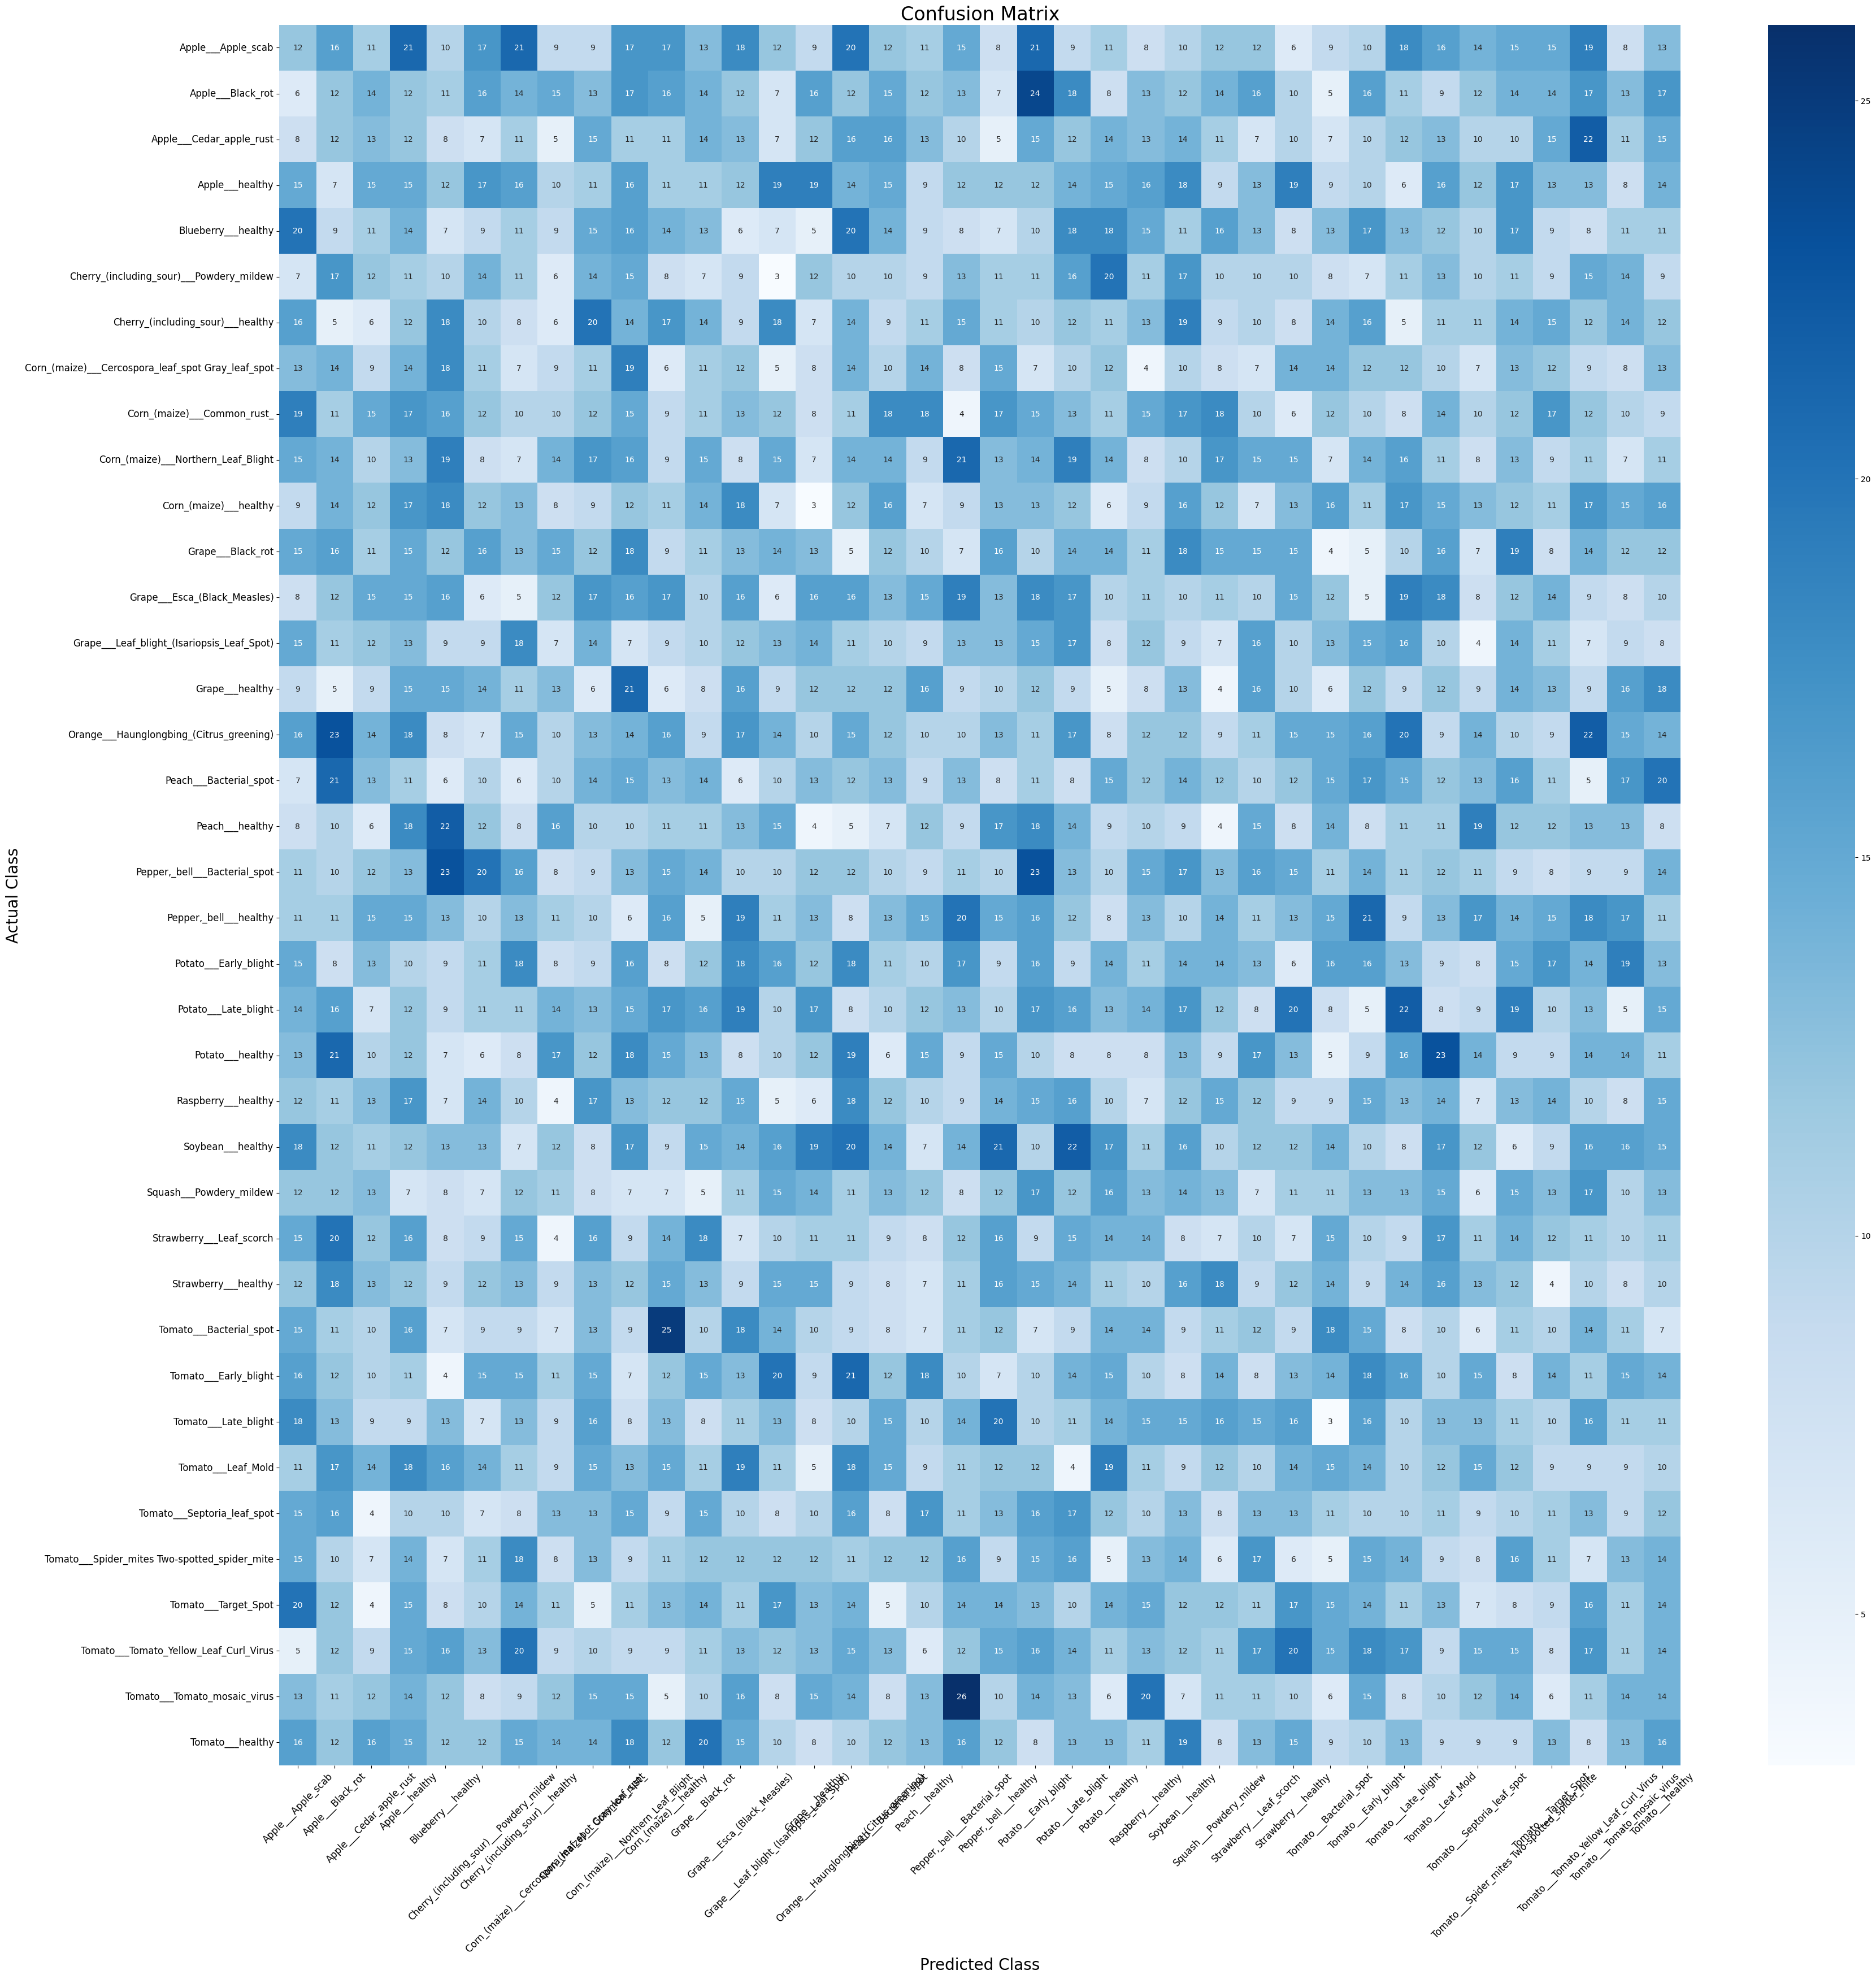

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("trained_model.keras")

# Predict on validation set
y_probs = model.predict(validation_set)
y_pred = np.argmax(y_probs, axis=1)

# Get true labels
y_true = []
for images, labels in validation_set:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = validation_set.class_names  # Assumes you used image_dataset_from_directory

# Plot and save confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={'size': 10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Confusion Matrix", fontsize=24)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Save the figure
os.makedirs("results", exist_ok=True)
plt.savefig("results/confusion_matrix.png", dpi=300)
plt.show()


In [27]:
# Save true and predicted labels to .npy files
import numpy as np

np.save("y_true.npy", y_true)
np.save("y_pred.npy", y_pred)

print("Saved y_true and y_pred successfully.")


Saved y_true and y_pred successfully.


CLASSIFICATION REPORT

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import os

# Step 1: Load the trained model
model = load_model("trained_model.keras")

# Step 2: Load the test set
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,  # ❗ must be False to match labels to predictions
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Step 3: Predict
y_probs = model.predict(test_set)
y_pred = np.argmax(y_probs, axis=1)

# Step 4: Get true labels
y_true = []
for _, labels in test_set:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

# Step 5: Get class names from dataset
class_names = test_set.class_names

# Step 6: Generate and print classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Step 7: Save report to file
os.makedirs("results", exist_ok=True)
with open("results/classification_report.txt", "w") as f:
    f.write(report)


Found 17572 files belonging to 38 classes.
550/550 [==============================] - 728s 1s/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       1.00      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.95      0.99      0.97       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00 

Normalized Confusion Matrix Heatmap

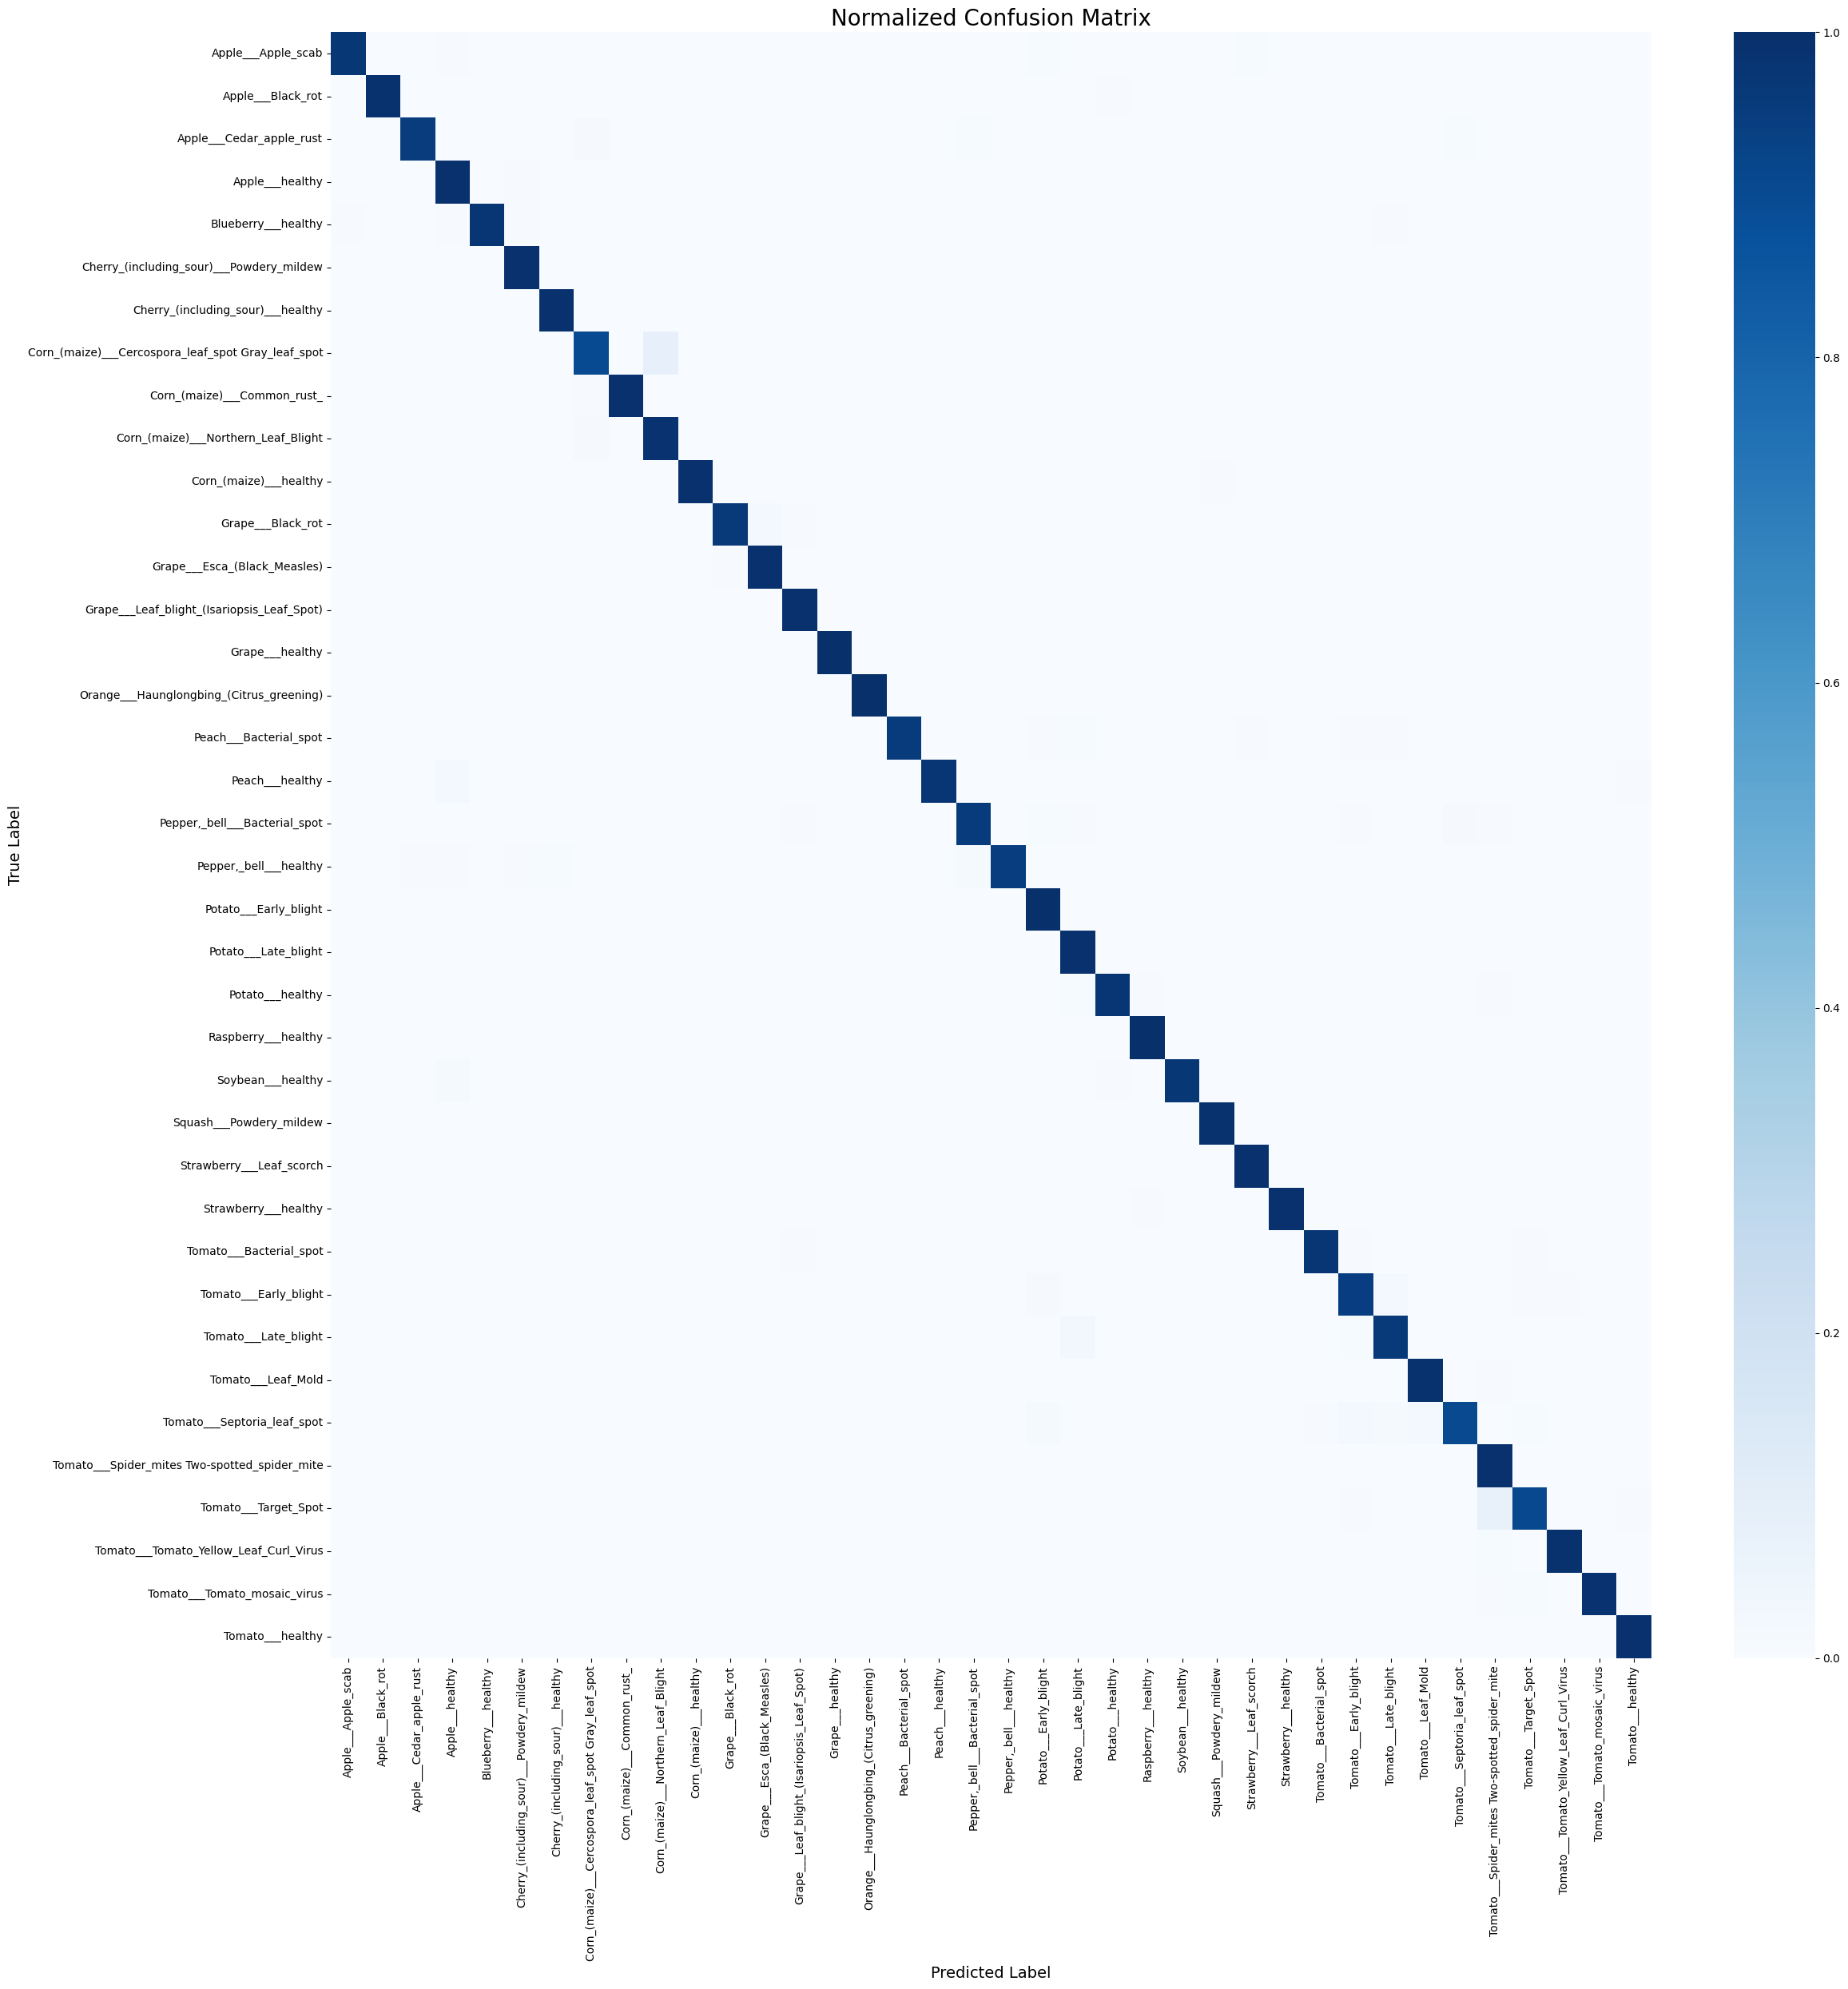

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 2: Normalize by row (true label)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Step 3: Plot
plt.figure(figsize=(25, 25))
sns.heatmap(cm_normalized, annot=False, cmap="Blues", 
            xticklabels=test_set.class_names, 
            yticklabels=test_set.class_names)

plt.title("Normalized Confusion Matrix", fontsize=20)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Save as image
import os
os.makedirs("results", exist_ok=True)
plt.savefig("results/normalized_confusion_matrix.png", dpi=300)
plt.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_4992\2625800157.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


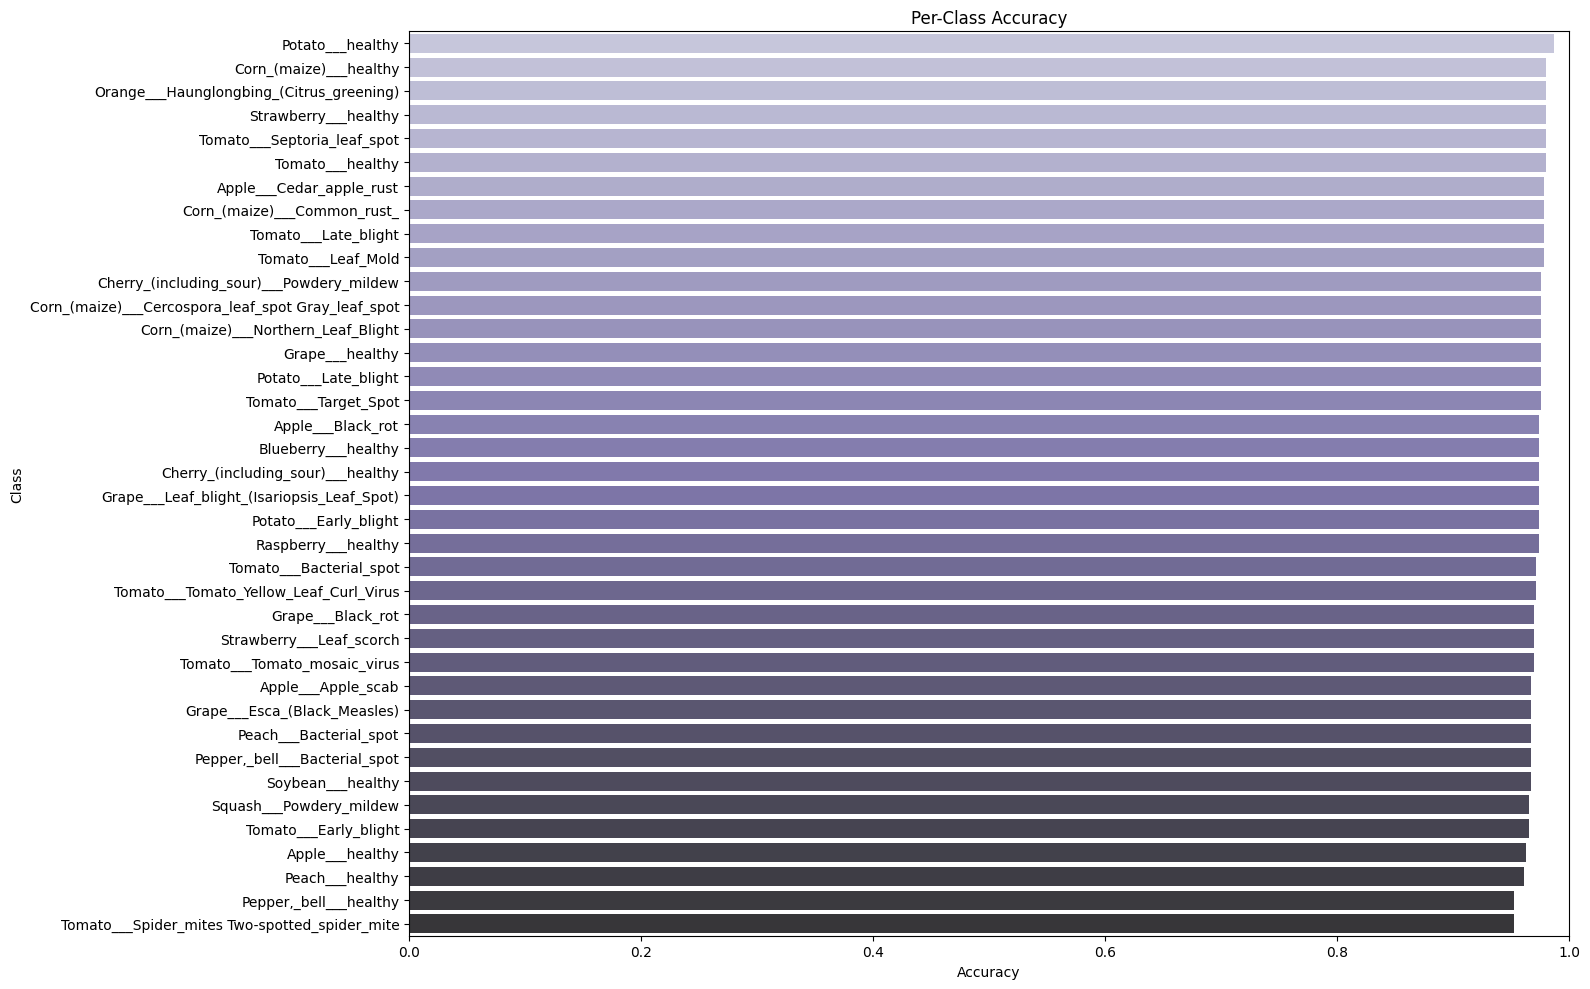

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load your predictions and true labels
y_true = np.load("y_true.npy")
y_pred = np.load("y_pred.npy")

# Define class names in the same order as your model outputs
class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
    'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

# Step 1: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 2: Per-class accuracy
per_class_accuracy = np.diag(cm) / np.sum(cm, axis=1)

# Step 3: Combine class names and accuracies
acc_data = list(zip(class_names, per_class_accuracy))

# Optional: Sort by accuracy
acc_data_sorted = sorted(acc_data, key=lambda x: x[1], reverse=True)

# Step 4: Plotting
plt.figure(figsize=(16, 10))
sns.barplot(
    y=[label for label, acc in acc_data_sorted],
    x=[acc for label, acc in acc_data_sorted],
    palette="Purples_d"
)
plt.xlabel("Accuracy")
plt.ylabel("Class")
plt.title("Per-Class Accuracy")
plt.xlim(0, 1.0)
plt.tight_layout()

# Save (optional)
plt.savefig("per_class_accuracy_verified.png", dpi=300)
plt.show()
